In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [8]:
df.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [9]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [10]:
df.shape

(16, 4)

In [12]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [16]:
X = df[['company','job','degree']]
y = df['salary_more_then_100k']

In [21]:
X.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [22]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [25]:
# Now as we know that machine learning models dont work well with string so we need to convert them into their respective columns
# therefore we will use the sklearn labelencoder
# For example if a columns has items like ford, gmc, kia, toyota, honda, nissan then moldel will not be able to understand it so we need to encode these
# names to a number which is assigned by the computer

# for example the label encoder can assign numbers to names like ford=1, gmc=2, kia=3 ......etc

from sklearn.preprocessing import LabelEncoder


In [27]:
# how lets encode conpany names

le_company = LabelEncoder()
X['company_n']=le_company.fit_transform(X['company'])
# this will create a new label and will assign the numbsers as well

In [30]:
X
# As we can see that the labelencoder have assigned 2->google, 0->ABC pharmacy, and 1->facebook

,company,job,degree,company_n
0,google,sales executive,bachelors,2
1,google,sales executive,masters,2
2,google,business manager,bachelors,2
3,google,business manager,masters,2
4,google,computer programmer,bachelors,2
5,google,computer programmer,masters,2
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,0


In [31]:
# Now lets repeat it for job column and degreee column

le_job = LabelEncoder()
X['job_n']=le_company.fit_transform(X['job'])


le_degree = LabelEncoder()
X['degree_n']=le_company.fit_transform(X['degree'])

In [33]:
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [37]:
# now since we have all the encoding done, we dont need the string columns so lets drop the columns
cols_to_drop = ['company','job','degree']
X=X.drop(cols_to_drop, axis=1)

In [38]:
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [42]:
# Now lets split the dataframe into train test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Just to see how the train test have split the data

print("Xtrain =",len(X_train))
print("Xtest =",len(X_test))
print("ytrain =",len(y_train))
print("ytest =",len(y_test))
print("df=",len(df))

Xtrain = 12
Xtest = 4
ytrain = 12
ytest = 4
df= 16


In [39]:
from sklearn import tree


In [40]:
model = tree.DecisionTreeClassifier()

In [48]:
# now lets trai the model

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
model.score(X_test,y_test)

0.75

In [51]:
model.predict(X_test)

array([0, 0, 0, 1])

In [52]:
print(y_test)

0     0
1     0
5     1
14    1
Name: salary_more_then_100k, dtype: int64


In [53]:
# as we can see the model predicted 0,0,0,1 and the actual answer is 0,0,1,1 so pretty decent

In [ ]:
# KN


In [55]:
from sklearn import tree

[Text(0.5, 0.875, 'x[0] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.3, 0.625, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'x[0] <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.375, 'x[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

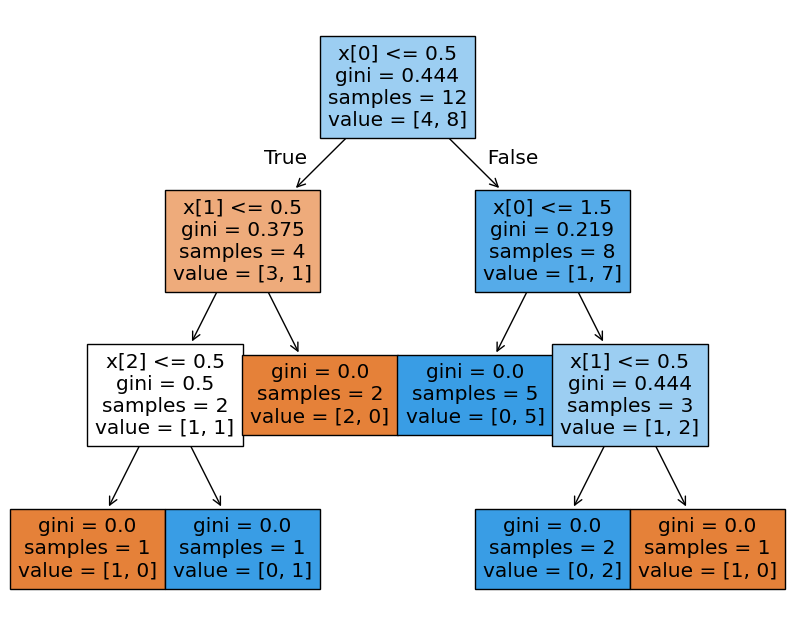

In [59]:
plt.figure(figsize=(10,8))
tree.plot_tree(model,filled=True)